# WEEK 02
# Encounter 07 - Matplotlib
# Project Challenge (PART 5) - Analyze the length of names

## Task Description

   * Plot the distribution of the length of each name for a given year
   * Does the distribution change over time?
   * Plot the average length of names over time!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read file with all names for all years
df_all = pd.read_csv(f'../data/baby_names_all_years.csv')
df_all

,name,gender,frequency,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
2021239,Zykell,M,5,2020
2021240,Zylus,M,5,2020
2021241,Zymari,M,5,2020
2021242,Zyn,M,5,2020


In [4]:
# add a calculated column to DataFrame: name_length = len(name)
#df_all['name_length'] = len(df_all['name']) -> len('Mary') = '2021244' ))))
df_all['name_length'] = df_all['name'].str.len()
df_all

,name,gender,frequency,year,name_length
0,Mary,F,7065,1880,4
1,Anna,F,2604,1880,4
2,Emma,F,2003,1880,4
3,Elizabeth,F,1939,1880,9
4,Minnie,F,1746,1880,6
...,...,...,...,...,...
2021239,Zykell,M,5,2020,6
2021240,Zylus,M,5,2020,5
2021241,Zymari,M,5,2020,6
2021242,Zyn,M,5,2020,3


In [6]:
# filtering the data just for 1 year: 2000
bool_mask = df_all['year'] == 2000
df_2000 = df_all[bool_mask]
df_2000

,name,gender,frequency,year,name_length
1333008,Emily,F,25957,2000,5
1333009,Hannah,F,23085,2000,6
1333010,Madison,F,19968,2000,7
1333011,Ashley,F,17997,2000,6
1333012,Sarah,F,17708,2000,5
...,...,...,...,...,...
1362779,Zeph,M,5,2000,4
1362780,Zeven,M,5,2000,5
1362781,Ziggy,M,5,2000,5
1362782,Zo,M,5,2000,2


In [7]:
# Checking for the name dups for 2000 year
df_2000.nunique()


name           27519
gender             2
frequency       1285
year               1
name_length       14
dtype: int64

In [11]:
# it is not helpful!!!

# getting only records with unique names:
#array_of_unique_names = pd.unique(df_2000['name'])
#pd.DataFrame(array_of_unique_names)

,0
0,Emily
1,Hannah
2,Madison
3,Ashley
4,Sarah
...,...
27514,Zeph
27515,Zeven
27516,Ziggy
27517,Zo


In [17]:
# marking unique names as dup=1 and the repeated names with dup=2 (setting row_number in a group for particular name)
df_2000['dup'] = df_2000.groupby(['name']).cumcount()+1
df_2000

C:\Users\anast\AppData\Local\Temp\ipykernel_11580\2197815615.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2000['dup'] = df_2000.groupby(['name']).cumcount()+1


,name,gender,frequency,year,name_length,dup
1333008,Emily,F,25957,2000,5,1
1333009,Hannah,F,23085,2000,6,1
1333010,Madison,F,19968,2000,7,1
1333011,Ashley,F,17997,2000,6,1
1333012,Sarah,F,17708,2000,5,1
...,...,...,...,...,...,...
1362779,Zeph,M,5,2000,4,1
1362780,Zeven,M,5,2000,5,1
1362781,Ziggy,M,5,2000,5,1
1362782,Zo,M,5,2000,2,1


In [30]:
# getting just dup=1 records (getting rid of dup=2)
mask=df_2000['dup'] == 1
df_2000_unique = df_2000[mask][['name','name_length']]

# saving not filtered nd filtered sets as csv files
df_2000.to_csv('../data02/df_2000.csv')
df_2000_unique.to_csv('../data02/df_2000_unique.csv')


df_2000_unique

,name,name_length
1333008,Emily,5
1333009,Hannah,6
1333010,Madison,7
1333011,Ashley,6
1333012,Sarah,5
...,...,...
1362779,Zeph,4
1362780,Zeven,5
1362781,Ziggy,5
1362782,Zo,2


Text(0, 0.5, 'Name Length')

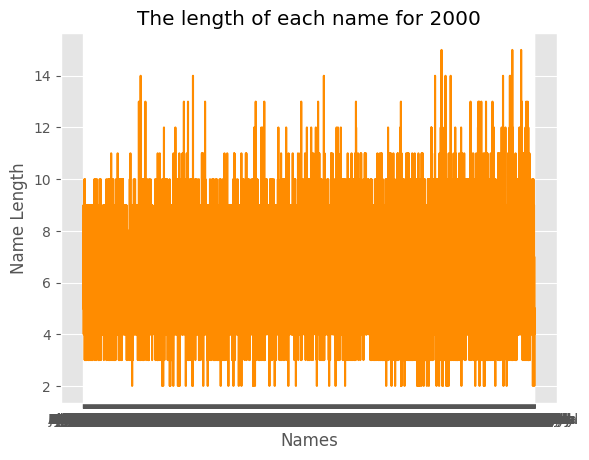

In [28]:
# Plot the distribution of the length of each name for a given year

x_vals = df_2000_unique['name']
y_vals = df_2000_unique['name_length']

# plotting starts
plt.style.use('ggplot')
#plt.figure(figsize=(10, 4))

plt.plot(x_vals, y_vals, label='name length', color='darkorange')

# title
plt.title('The length of each name for 2000')

# label names
plt.xlabel('Names')
plt.ylabel('Name Length')


### Part 2
### Plot the average length of names over time

In [33]:
df_all[['year', 'name_length']]

,year,name_length
0,1880,4
1,1880,4
2,1880,4
3,1880,9
4,1880,6
...,...,...
2021239,2020,6
2021240,2020,5
2021241,2020,6
2021242,2020,3


In [48]:
# grouping data by 'year' and calculating avg() over each year
avg_name_len_all_years = df_all[['year', 'name_length']].groupby(['year']).mean()
#avg_name_len_all_years

avg_name_len_all_years_rounded = avg_name_len_all_years.round(2)
avg_name_len_all_years_rounded.reset_index(inplace=True)
avg_name_len_all_years_rounded


,year,name_length
0,1880,5.70
1,1881,5.67
2,1882,5.72
3,1883,5.70
4,1884,5.72
...,...,...
136,2016,6.15
137,2017,6.14
138,2018,6.12
139,2019,6.10


Text(0, 0.5, 'Average Name Length')

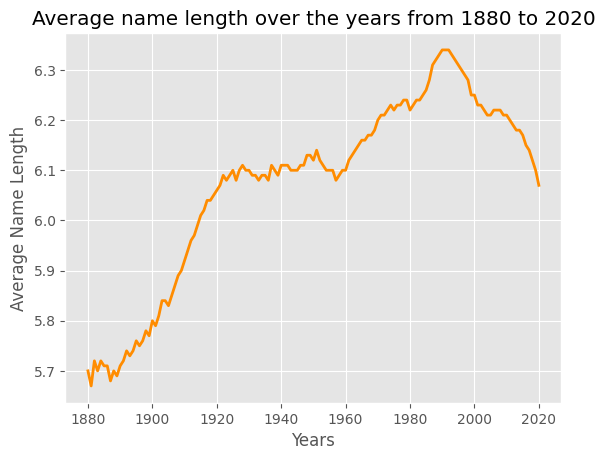

In [51]:
# Plot the distribution of the length of each name for a given year

x = avg_name_len_all_years_rounded['year']
y = avg_name_len_all_years_rounded['name_length']

# plotting starts
#plt.style.use('ggplot')
#plt.figure(figsize=(10, 7))

plt.plot(x, y, label='average name length', color='darkorange', linewidth=2)

# title
plt.title('Average name length over the years from 1880 to 2020')

# label names
plt.xlabel('Years')
plt.ylabel('Average Name Length')
